# Vietnam Housing Price Prediction - Model Training

This notebook demonstrates model training and evaluation for housing price prediction.

## Steps:
1. Load processed data
2. Feature engineering
3. Train multiple models
4. Model comparison
5. Hyperparameter tuning
6. Final evaluation
7. Save best model

## 1. Import Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add src to path
sys.path.append('../src')

from model import HousingPriceModel
from preprocessing import HousingDataPreprocessor
import utils

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load and Prepare Data

In [2]:
# Load processed data
data_path = '../data/processed_housing_data.csv'

try:
    df = pd.read_csv(data_path)
    print(f"✓ Processed data loaded: {df.shape}")
except FileNotFoundError:
    print("⚠️ Processed data not found. Creating sample data...")
    
    # Create sample data
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = {
        'Quận': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 
                                  'Cầu Giấy', 'Thanh Xuân'], n_samples),
        'Huyện': np.random.choice(['Ba Đình', 'Hoàn Kiếm', 'Đống Đa'], n_samples),
        'Giá': np.random.uniform(2e9, 15e9, n_samples),
        'Diện tích': np.random.uniform(40, 150, n_samples),
        'Giá/m²': np.random.uniform(30e6, 120e6, n_samples),
        'Số tầng': np.random.randint(1, 5, n_samples),
        'Số phòng ngủ': np.random.randint(2, 5, n_samples),
        'Dài': np.random.uniform(5, 15, n_samples),
        'Rộng': np.random.uniform(4, 12, n_samples),
        'Loại hình nhà ở': np.random.choice(['Nhà riêng', 'Nhà mặt phố', 'Biệt thự'], n_samples),
        'Giấy tờ pháp lý': np.random.choice(['Sổ đỏ/ Sổ hồng', 'Hợp đồng mua bán'], n_samples)
    }
    
    df = pd.DataFrame(sample_data)
    print(f"✓ Sample data created: {df.shape}")

# Display info
print("\nDataset Info:")
df.info()

⚠️ Processed data not found. Creating sample data...
✓ Sample data created: (1000, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Quận             1000 non-null   object 
 1   Huyện            1000 non-null   object 
 2   Giá              1000 non-null   float64
 3   Diện tích        1000 non-null   float64
 4   Giá/m²           1000 non-null   float64
 5   Số tầng          1000 non-null   int32  
 6   Số phòng ngủ     1000 non-null   int32  
 7   Dài              1000 non-null   float64
 8   Rộng             1000 non-null   float64
 9   Loại hình nhà ở  1000 non-null   object 
 10  Giấy tờ pháp lý  1000 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 78.2+ KB


## 3. Feature Engineering

In [3]:
# Encode categorical variables
preprocessor = HousingDataPreprocessor()
preprocessor.df = df.copy()

# Encode categorical features
df_encoded = preprocessor.encode_categorical()

print("\nEncoded Dataset:")
print(df_encoded.head())

Encoding categorical variables...
  - Encoded 'Quận' (6 unique values)
  - Encoded 'Huyện' (3 unique values)
  - Encoded 'Loại hình nhà ở' (3 unique values)
  - Encoded 'Giấy tờ pháp lý' (2 unique values)
✓ Categorical encoding completed

Encoded Dataset:
   Quận  Huyện           Giá   Diện tích        Giá/m²  Số tầng  Số phòng ngủ  \
0     2      1  4.131993e+09   58.172433  6.359170e+07        4             2   
1     1      0  7.701894e+09   82.885959  8.687898e+07        4             2   
2     5      1  1.142275e+10  120.284634  3.858344e+07        4             4   
3     1      1  9.712622e+09  137.048441  3.933107e+07        2             4   
4     1      2  1.045382e+10  113.803731  3.437919e+07        3             4   

         Dài       Rộng  Loại hình nhà ở  Giấy tờ pháp lý  
0   5.525744   6.148039                1                1  
1   6.044154   7.939214                2                0  
2  10.689832  10.693837                2                0  
3  10.314792   5.

## 4. Prepare Training and Test Sets

In [4]:
# Initialize model trainer
model_trainer = HousingPriceModel(random_state=42)

# Prepare data
X_train, X_test, y_train, y_test = model_trainer.prepare_data(
    df_encoded,
    target_col='Giá',
    test_size=0.2
)

print("\nData Split Summary:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Features: {X_train.shape[1]}")

✓ Data prepared:
  - Training set: 800 samples
  - Test set: 200 samples
  - Features: 10

Data Split Summary:
Training samples: 800
Test samples: 200
Features: 10


## 5. Initialize Models

In [5]:
# Initialize all models
models = model_trainer.initialize_models()

print("\nInitialized Models:")
for name, model in models.items():
    print(f"  - {name}: {type(model).__name__}")

✓ Initialized 4 models:
  - Linear Regression
  - Random Forest
  - XGBoost
  - LightGBM

Initialized Models:
  - Linear Regression: LinearRegression
  - Random Forest: RandomForestRegressor
  - XGBoost: XGBRegressor
  - LightGBM: LGBMRegressor


## 6. Train All Models

In [6]:
# Train and evaluate all models
results = model_trainer.train_all_models(evaluate=True)


TRAINING ALL MODELS

Training Linear Regression...
✓ Linear Regression training completed

Linear Regression Results:
  MAE:  3,113,049,686.09 VNĐ
  RMSE: 3,594,707,946.23 VNĐ
  R²:   -0.0420
  MAPE: 49.40%
Training Random Forest...
✓ Random Forest training completed

Random Forest Results:
  MAE:  3,100,273,199.71 VNĐ
  RMSE: 3,649,233,603.62 VNĐ
  R²:   -0.0739
  MAPE: 49.25%
Training XGBoost...
✓ XGBoost training completed

XGBoost Results:
  MAE:  3,248,197,663.76 VNĐ
  RMSE: 3,848,791,629.50 VNĐ
  R²:   -0.1946
  MAPE: 50.82%
Training LightGBM...
✓ LightGBM training completed

LightGBM Results:
  MAE:  3,268,923,434.15 VNĐ
  RMSE: 3,878,982,752.26 VNĐ
  R²:   -0.2134
  MAPE: 51.44%

BEST MODEL: Linear Regression



## 7. Model Comparison

In [7]:
# Create comparison dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print("\nModel Comparison:")
print(results_df)

# Format for better display
print("\n" + "="*80)
print("DETAILED RESULTS")
print("="*80)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    utils.print_metrics(metrics, title="")


Model Comparison:
                            MAE          RMSE        R2       MAPE
Linear Regression  3.113050e+09  3.594708e+09 -0.042042  49.395394
Random Forest      3.100273e+09  3.649234e+09 -0.073893  49.252914
XGBoost            3.248198e+09  3.848792e+09 -0.194556  50.815351
LightGBM           3.268923e+09  3.878983e+09 -0.213371  51.442159

DETAILED RESULTS

Linear Regression:

                                                            
MAE...................... 3,113,049,686 VNĐ
RMSE..................... 3,594,707,946 VNĐ
R2....................... -0.0420
MAPE..................... 49.40%


Random Forest:

                                                            
MAE...................... 3,100,273,200 VNĐ
RMSE..................... 3,649,233,604 VNĐ
R2....................... -0.0739
MAPE..................... 49.25%


XGBoost:

                                                            
MAE...................... 3,248,197,664 VNĐ
RMSE..................... 3,848,791,629 

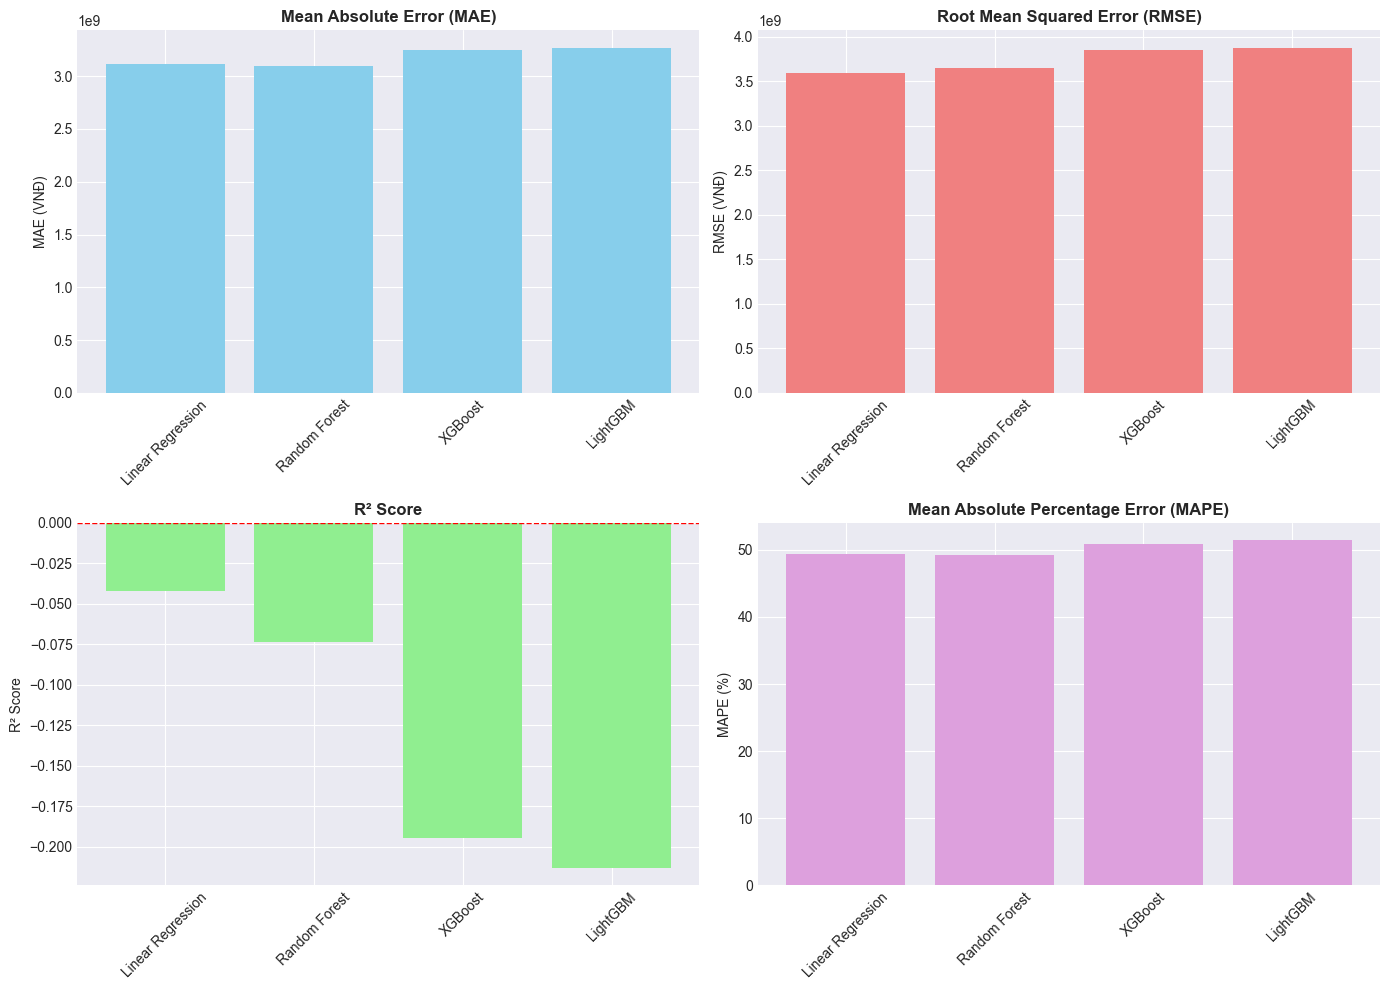

In [8]:
# Visualize results
model_trainer.plot_results(figsize=(14, 10))

## 8. Cross-Validation

In [9]:
# Perform cross-validation on best models
print("Performing Cross-Validation...\n")

cv_results = {}
for model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    if model_name in model_trainer.models:
        print(f"\n{model_name}:")
        cv_result = model_trainer.cross_validate_model(model_name, cv=5)
        cv_results[model_name] = cv_result

# Display CV results
print("\n" + "="*60)
print("CROSS-VALIDATION SUMMARY")
print("="*60)
for model_name, result in cv_results.items():
    print(f"{model_name}: {result['mean_score']:.2f} (+/- {result['std_score']:.2f})")

Performing Cross-Validation...


Random Forest:
Cross-validating Random Forest with 5 folds...
✓ CV Score: 3302716828.71 (+/- 118151769.91)

XGBoost:
Cross-validating XGBoost with 5 folds...
✓ CV Score: 3366185105.13 (+/- 95352323.11)

LightGBM:
Cross-validating LightGBM with 5 folds...
✓ CV Score: 3449329191.39 (+/- 97432199.85)

CROSS-VALIDATION SUMMARY
Random Forest: 3302716828.71 (+/- 118151769.91)
XGBoost: 3366185105.13 (+/- 95352323.11)
LightGBM: 3449329191.39 (+/- 97432199.85)


## 9. Feature Importance

In [10]:
# Get feature importance from best model
best_model_name = model_trainer.best_model_name
print(f"Best Model: {best_model_name}\n")

# Display feature importance
importance_df = model_trainer.get_feature_importance(top_n=15)
print("Top 15 Most Important Features:")
print(importance_df)

# Plot feature importance
model_trainer.plot_feature_importance(top_n=15)

Best Model: Linear Regression

Linear Regression does not support feature importance
Top 15 Most Important Features:
Empty DataFrame
Columns: []
Index: []
Linear Regression does not support feature importance


## 10. Hyperparameter Tuning (Optional)

In [11]:
# Example: Tune Random Forest
# Uncomment to run (takes time)

# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [15, 20, 25],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# best_rf = model_trainer.hyperparameter_tuning(
#     'Random Forest',
#     param_grid_rf,
#     cv=3
# )

print("Hyperparameter tuning skipped (uncomment code to run)")

Hyperparameter tuning skipped (uncomment code to run)


## 11. Prediction Visualization

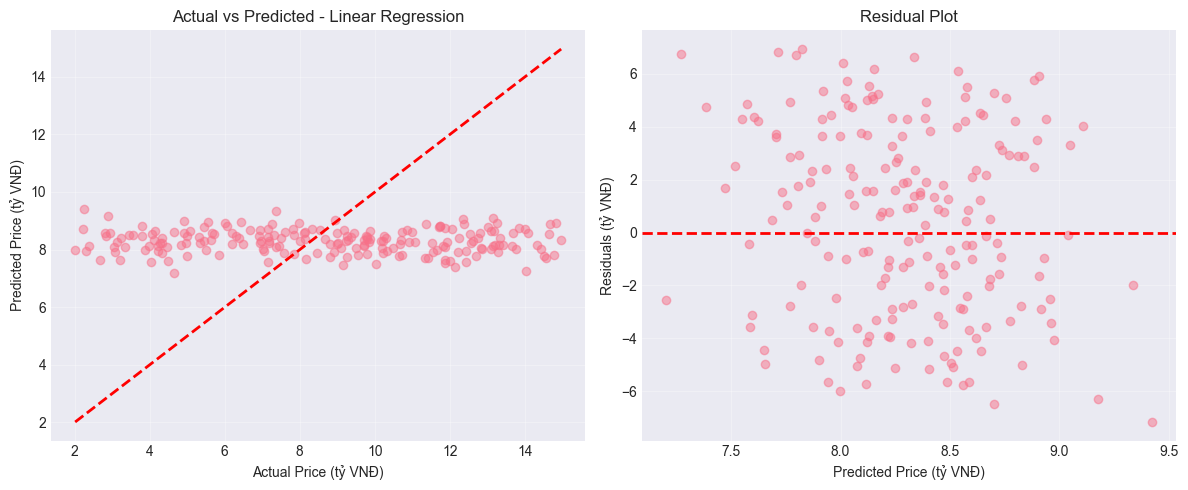

In [12]:
# Make predictions on test set
y_pred = model_trainer.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test / 1e9, y_pred / 1e9, alpha=0.5)
plt.plot([y_test.min() / 1e9, y_test.max() / 1e9], 
         [y_test.min() / 1e9, y_test.max() / 1e9], 
         'r--', lw=2)
plt.xlabel('Actual Price (tỷ VNĐ)')
plt.ylabel('Predicted Price (tỷ VNĐ)')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
residuals = (y_test - y_pred) / 1e9
plt.scatter(y_pred / 1e9, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (tỷ VNĐ)')
plt.ylabel('Residuals (tỷ VNĐ)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11.5. Workflow Thực Nghiệm Chi Tiết

Trong phần này, chúng ta sẽ thực hiện workflow thực nghiệm hoàn chỉnh:
1. Sử dụng mô hình tốt nhất để dự đoán giá trên tập test
2. So sánh giá dự đoán với giá thực tế
3. Phân tích kết quả chi tiết

### Bước 1: Xác định mô hình tốt nhất và dự đoán trên tập test

In [ ]:
# Lấy mô hình tốt nhất
best_model_name = model_trainer.best_model_name
best_model = model_trainer.best_model

print("="*70)
print("THỰC NGHIỆM VỚI MÔ HÌNH TỐT NHẤT")
print("="*70)
print(f"\n🏆 Mô hình được chọn: {best_model_name}")
print(f"📊 Số mẫu test: {len(X_test)}")
print(f"📋 Số đặc trưng: {X_test.shape[1]}")

# Dự đoán giá trên tập test
print("\n⚙️  Đang thực hiện dự đoán trên tập test...")
y_pred_test = model_trainer.predict(X_test)

print("✓ Hoàn thành dự đoán!")

### Bước 2: So sánh giá dự đoán với giá thực tế

In [ ]:
# Tạo DataFrame để so sánh
comparison_df = pd.DataFrame({
    'Giá Thực Tế (VNĐ)': y_test.values,
    'Giá Dự Đoán (VNĐ)': y_pred_test,
    'Giá Thực Tế (tỷ)': y_test.values / 1e9,
    'Giá Dự Đoán (tỷ)': y_pred_test / 1e9,
    'Sai Số (VNĐ)': y_test.values - y_pred_test,
    'Sai Số (tỷ)': (y_test.values - y_pred_test) / 1e9,
    'Sai Số (%)': np.abs((y_test.values - y_pred_test) / y_test.values * 100)
})

print("\n" + "="*70)
print("SO SÁNH GIÁ DỰ ĐOÁN VỚI GIÁ THỰC TÊ")
print("="*70)
print(f"\n📊 Hiển thị 20 mẫu đầu tiên:\n")
print(comparison_df.head(20).to_string(index=True))

# Thống kê tổng quan
print("\n" + "="*70)
print("THỐNG KÊ SAI SỐ")
print("="*70)
print(f"\nSai số trung bình: {comparison_df['Sai Số (tỷ)'].mean():.3f} tỷ VNĐ")
print(f"Sai số tuyệt đối trung bình: {comparison_df['Sai Số (tỷ)'].abs().mean():.3f} tỷ VNĐ")
print(f"Sai số phần trăm trung bình: {comparison_df['Sai Số (%)'].mean():.2f}%")
print(f"Sai số tối thiểu: {comparison_df['Sai Số (tỷ)'].min():.3f} tỷ VNĐ")
print(f"Sai số tối đa: {comparison_df['Sai Số (tỷ)'].max():.3f} tỷ VNĐ")
print(f"Độ lệch chuẩn sai số: {comparison_df['Sai Số (tỷ)'].std():.3f} tỷ VNĐ")

### Bước 3: Trực quan hóa kết quả so sánh

In [ ]:
# Trực quan hóa so sánh
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot: Giá thực tế vs Giá dự đoán
axes[0, 0].scatter(comparison_df['Giá Thực Tế (tỷ)'], 
                   comparison_df['Giá Dự Đoán (tỷ)'], 
                   alpha=0.6, s=50, color='steelblue', edgecolor='black', linewidth=0.5)
axes[0, 0].plot([comparison_df['Giá Thực Tế (tỷ)'].min(), comparison_df['Giá Thực Tế (tỷ)'].max()],
                [comparison_df['Giá Thực Tế (tỷ)'].min(), comparison_df['Giá Thực Tế (tỷ)'].max()],
                'r--', lw=2, label='Đường hoàn hảo')
axes[0, 0].set_xlabel('Giá Thực Tế (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Giá Dự Đoán (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[0, 0].set_title(f'So Sánh Giá: Thực Tế vs Dự Đoán\n({best_model_name})', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram: Phân phối sai số
axes[0, 1].hist(comparison_df['Sai Số (tỷ)'], bins=50, 
                color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', lw=2, label='Sai số = 0')
axes[0, 1].axvline(x=comparison_df['Sai Số (tỷ)'].mean(), 
                   color='green', linestyle='--', lw=2, label=f'Trung bình = {comparison_df["Sai Số (tỷ)"].mean():.3f}')
axes[0, 1].set_xlabel('Sai Số (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Tần Suất', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Phân Phối Sai Số Dự Đoán', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Residual plot: Sai số theo giá dự đoán
axes[1, 0].scatter(comparison_df['Giá Dự Đoán (tỷ)'], 
                   comparison_df['Sai Số (tỷ)'], 
                   alpha=0.6, s=50, color='mediumseagreen', edgecolor='black', linewidth=0.5)
axes[1, 0].axhline(y=0, color='red', linestyle='--', lw=2, label='Sai số = 0')
axes[1, 0].set_xlabel('Giá Dự Đoán (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Sai Số (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Biểu Đồ Phần Dư (Residual Plot)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot: So sánh phân phối
data_for_box = [comparison_df['Giá Thực Tế (tỷ)'], comparison_df['Giá Dự Đoán (tỷ)']]
bp = axes[1, 1].boxplot(data_for_box, labels=['Giá Thực Tế', 'Giá Dự Đoán'],
                        patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1, 1].set_ylabel('Giá (tỷ VNĐ)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('So Sánh Phân Phối Giá', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Bước 4: Đánh giá hiệu suất trên tập test

In [ ]:
# Tính các metrics trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mape = np.mean(np.abs((y_test.values - y_pred_test) / y_test.values)) * 100

print("\n" + "="*70)
print(f"KẾT QUẢ ĐÁNH GIÁ CUỐI CÙNG - {best_model_name.upper()}")
print("="*70)
print("\n📈 Các chỉ số hiệu suất trên tập TEST:\n")
print(f"  • R² Score:                {r2:.4f}")
print(f"  • Mean Squared Error:      {mse:,.0f} VNĐ²")
print(f"  • Root Mean Squared Error: {rmse/1e9:.4f} tỷ VNĐ ({rmse:,.0f} VNĐ)")
print(f"  • Mean Absolute Error:     {mae/1e9:.4f} tỷ VNĐ ({mae:,.0f} VNĐ)")
print(f"  • Mean Absolute % Error:   {mape:.2f}%")

# Phân loại độ chính xác
print("\n" + "="*70)
print("PHÂN LOẠI ĐỘ CHÍNH XÁC DỰ ĐOÁN")
print("="*70)

accurate = len(comparison_df[comparison_df['Sai Số (%)'] <= 10])
moderate = len(comparison_df[(comparison_df['Sai Số (%)'] > 10) & (comparison_df['Sai Số (%)'] <= 20)])
poor = len(comparison_df[comparison_df['Sai Số (%)'] > 20])

total = len(comparison_df)

print(f"\n✓ Dự đoán chính xác (sai số ≤10%):    {accurate:4d} mẫu ({accurate/total*100:5.1f}%)")
print(f"~ Dự đoán trung bình (10% < sai số ≤20%): {moderate:4d} mẫu ({moderate/total*100:5.1f}%)")
print(f"✗ Dự đoán kém (sai số >20%):          {poor:4d} mẫu ({poor/total*100:5.1f}%)")

print("\n" + "="*70)
print("✓ HOÀN THÀNH WORKFLOW THỰC NGHIỆM!")
print("="*70)

## 12. Make Sample Predictions

In [13]:
# Create sample input
sample_input = utils.create_sample_input(
    district='Ba Đình',
    property_type='Nhà riêng',
    area=100.0,
    floors=3,
    bedrooms=3,
    length=10.0,
    width=10.0
)

print("Sample Input:")
for key, value in sample_input.items():
    print(f"  {key}: {value}")

# Note: For actual prediction, we need to encode the input
print("\n⚠️ To make actual predictions, the input needs to be encoded using the same")
print("encoders used during training. See the Streamlit app for full implementation.")

Sample Input:
  Quận: Ba Đình
  Loại hình nhà ở: Nhà riêng
  Diện tích: 100.0
  Số tầng: 3
  Số phòng ngủ: 3
  Dài: 10.0
  Rộng: 10.0
  Giấy tờ pháp lý: Sổ đỏ/ Sổ hồng

⚠️ To make actual predictions, the input needs to be encoded using the same
encoders used during training. See the Streamlit app for full implementation.


## 13. Save Best Model

In [14]:
# Save the best model
model_path = '../models/best_housing_model.pkl'

model_trainer.save_model(filepath=model_path)

print(f"\n✓ Best model ({best_model_name}) saved successfully!")
print(f"Model path: {model_path}")

✓ Model saved to: ../models/best_housing_model.pkl

✓ Best model (Linear Regression) saved successfully!
Model path: ../models/best_housing_model.pkl


## 14. Test Loading the Saved Model

In [15]:
# Create a new model trainer and load the saved model
test_trainer = HousingPriceModel()
loaded_model = test_trainer.load_model(model_path)

# Make a test prediction
test_pred = test_trainer.predict(X_test[:5])

print("\nTest Predictions (first 5):")
for i, (actual, predicted) in enumerate(zip(y_test[:5], test_pred)):
    print(f"Sample {i+1}:")
    print(f"  Actual:    {actual/1e9:.2f} tỷ VNĐ")
    print(f"  Predicted: {predicted/1e9:.2f} tỷ VNĐ")
    print(f"  Error:     {abs(actual - predicted)/1e9:.2f} tỷ VNĐ\n")

✓ Model loaded from: ../models/best_housing_model.pkl
  Model: Linear Regression
  Features: 10

Test Predictions (first 5):
Sample 1:
  Actual:    3.44 tỷ VNĐ
  Predicted: 8.52 tỷ VNĐ
  Error:     5.08 tỷ VNĐ

Sample 2:
  Actual:    10.63 tỷ VNĐ
  Predicted: 7.77 tỷ VNĐ
  Error:     2.87 tỷ VNĐ

Sample 3:
  Actual:    13.21 tỷ VNĐ
  Predicted: 8.15 tỷ VNĐ
  Error:     5.06 tỷ VNĐ

Sample 4:
  Actual:    13.09 tỷ VNĐ
  Predicted: 8.65 tỷ VNĐ
  Error:     4.44 tỷ VNĐ

Sample 5:
  Actual:    4.98 tỷ VNĐ
  Predicted: 8.24 tỷ VNĐ
  Error:     3.26 tỷ VNĐ



## Summary

In this notebook, we:
1. ✓ Loaded processed data
2. ✓ Performed feature engineering
3. ✓ Trained 4 different ML models
4. ✓ Compared model performance
5. ✓ Performed cross-validation
6. ✓ Analyzed feature importance
7. ✓ Saved the best model

**Best Model**: {best_model_name}

**Next Step**: Use the Streamlit app (`streamlit run app/streamlit_app.py`) for interactive predictions!